In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.patches as mpatches
import math
import matplotlib.lines as mlines
import os
import cv2 as cv
from IPython.display import Video
import matplotlib.cm as cm
import matplotlib.animation as animation
import matplotlib.image as mpimg
from matplotlib.pyplot import figure

In [2]:
temps = list(range(25,75,5))
numtemps = len(temps);
angle_step = 45;
angle_start = 0;
angle_stop = 135;
angles = list(range(0,180,45));
numangles = len(angles)
imgs = np.zeros([numtemps,numangles,256,320])
std = np.zeros([numtemps,numangles,256,320])


for i in range(numtemps):
    for j in range(numangles):
        with h5py.File('C:\\Users\\khart\\Documents\\IRCSP2_data\\Jaclyn\\BB_polarized\\run3\\' + str(temps[i]) + 'C\\' + str(angles[j]) + 'deg.h5', "r") as f:

            # Get the data
            imgs[i,j,:,:] = np.array(f[list(f.keys())[0]])
            std[i,j,:,:] = np.array(f[list(f.keys())[2]])

In [6]:
darkfield = np.zeros([numangles,256,320])
for j in range(numangles):
    with h5py.File('C:\\Users\\khart\\Documents\\IRCSP2_data\\Jaclyn\\BB_polarized\\run3\\darkfield\\' + str(angles[j]) + 'deg.h5', "r") as f:

        # Get the data
        darkfield[j,:,:] = np.array(f[list(f.keys())[0]])

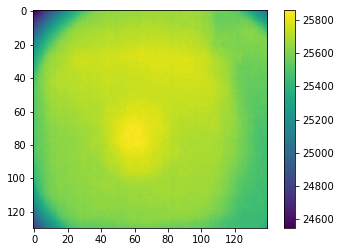

In [16]:
plt.imshow(imgs[8,0,45:175,75:215])
plt.colorbar()

In [17]:
ymin=45
ymax=175
xmin=75
xmax=215

In [18]:
deg0 = imgs[:,0,:,:] - np.mean(darkfield[0])
deg45 = imgs[:,1,:,:] - np.mean(darkfield[1])
deg90 = imgs[:,2,:,:] - np.mean(darkfield[2])
deg135 = imgs[:,3,:,:] - np.mean(darkfield[3])

stokes0 = deg0 + deg90
stokes1 = deg0 - deg90
stokes2 = deg45 - deg135

DOLP = np.sqrt(((stokes1)**2)+((stokes2)**2))/(stokes0)
AOLP = np.arctan2(stokes2,stokes1)/2

Text(0.5, 1.0, 'DOLP at 50C')

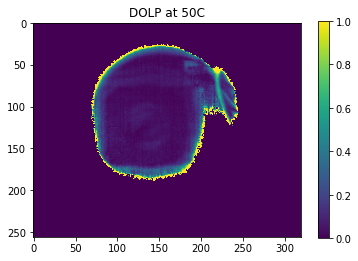

In [19]:
i = 5
plt.imshow(DOLP[i,:,:])
plt.colorbar()
plt.clim(0,1)
plt.title('DOLP at ' + str(temps[i]) + 'C')

Text(0.5, 1.0, 'AOLP at 50C')

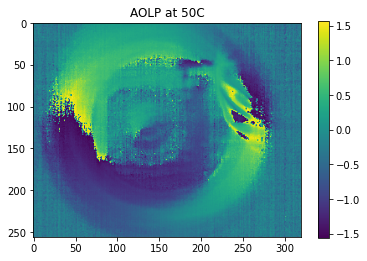

In [20]:
plt.imshow(AOLP[i,:,:])
plt.colorbar()
plt.title('AOLP at ' + str(temps[i]) + 'C')

In [24]:
DOLPs = np.zeros(numtemps)
for i in range(numtemps):
    DOLPs[i] = np.mean(DOLP[i,ymin:ymax,xmin:xmax])
AOLPs = np.zeros(numtemps)
for j in range(numtemps):
    AOLPs[j] = np.mean(AOLP[j,ymin:ymax,xmin:xmax])

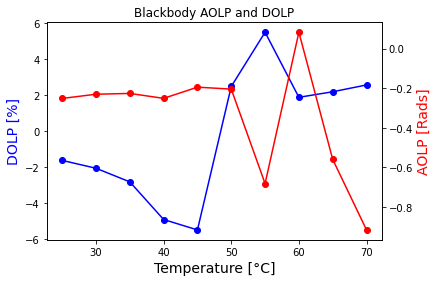

In [25]:
fig,ax = plt.subplots()
plt.title('Blackbody AOLP and DOLP')
ax.plot(temps, DOLPs*100, color="blue", marker="o")
ax.set_xlabel("Temperature [\N{DEGREE SIGN}C]",fontsize=14)
ax.set_ylabel("DOLP [%]",color="blue",fontsize=14)
ax2=ax.twinx()
ax2.plot(temps, AOLPs,color="red",marker="o")
ax2.set_ylabel("AOLP [Rads]",color="red",fontsize=14)
plt.show()

MovieWriter PillowWriter unavailable; using Pillow instead.


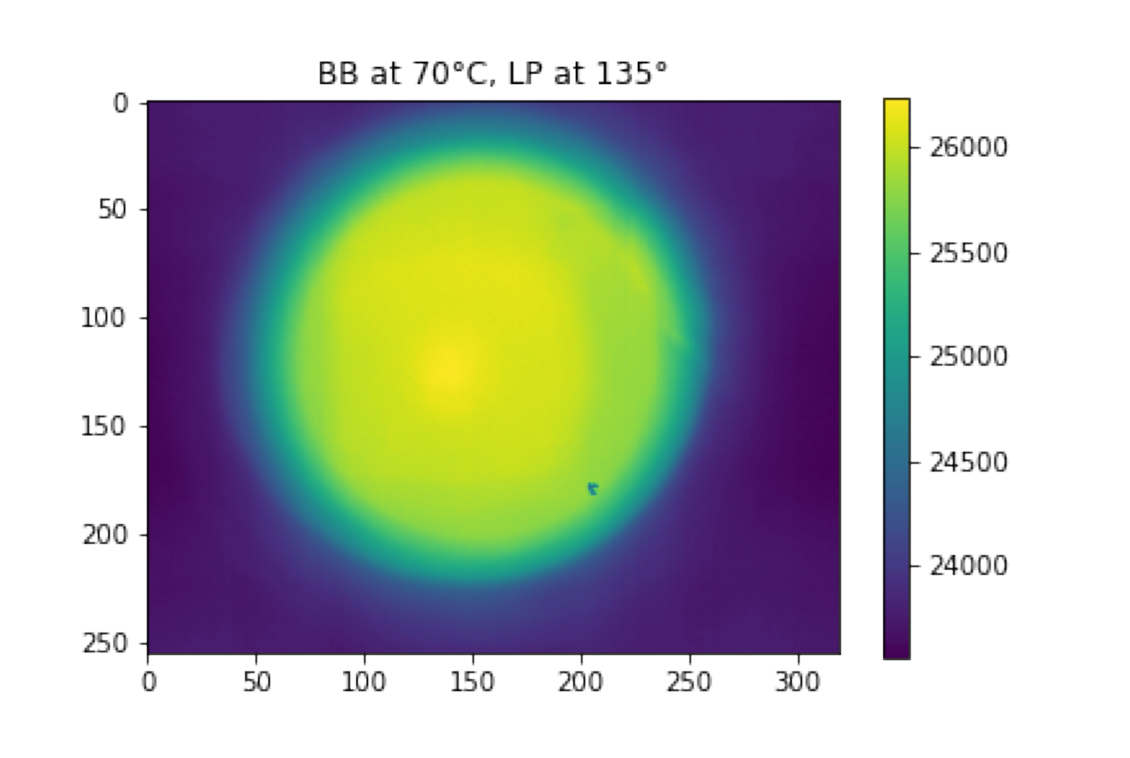

In [26]:
img = imgs

filenames = []
for i in range(numtemps):
    for j in range(numangles):
        plt.imshow(imgs[i,j,:,:])
        plt.title('BB at '+ str(temps[i]) +  '\N{DEGREE SIGN}C, LP at ' + str(angles[j]) +'\N{DEGREE SIGN}')
        plt.colorbar()
        filename = 'img'+str(i)+str(j)+'.png'
        filenames.append(filename)
        plt.savefig(filename)
        plt.close()

frames = [] # for storing the generated images
fig = plt.figure(figsize=(20, 20))
plt.axis("off")
for i in range(len(filenames)):
    frames.append([plt.imshow(mpimg.imread(filenames[i]),animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,repeat_delay=1000)

ani.save('C:\\Users\\khart\\Documents\\IRCSP2_data\\Jaclyn\\BB_polarized\\imagesanimation.gif', writer='PillowWriter', fps=.5)

for filename in set(filenames):
    os.remove(filename)